In [49]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn
import numpy as np


seaborn.set(font_scale=1.5,style='ticks')

# Linear algebra testing 

### Shear tranformation 

In [507]:
a = np.array([1,2])
M = np.array([[1,0],[1,1]])

In [508]:
for i in range(10):
    print(a)
    a = np.dot(M,a)

[1 2]
[1 3]
[1 4]
[1 5]
[1 6]
[1 7]
[1 8]
[1 9]
[ 1 10]
[ 1 11]


(-5, 5)

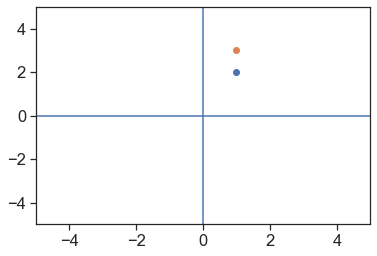

In [512]:
a = np.array([1,2])
plt.scatter(a[0],a[1])
a = np.dot(M,a)
plt.scatter(a[0],a[1])
plt.axhline(y=0)
plt.axvline(x=0)
plt.xlim(-5,5)
plt.ylim(-5,5)

## build matrix jordan form

In [562]:
tmp = np.random.uniform(0,1,size=(4,2))
tmp /= np.linalg.norm(tmp,axis=1)[:,None]

In [563]:
#[a, -b]
#[b, a]
def construct_diagonal_blocks(vals):
    """ 
    https://math.stackexchange.com/questions/1345694/algorithm-for-real-matrix-given-the-complex-eigenvalues/1345699#1345699
    https://math.stackexchange.com/questions/3218954/construct-a-real-matrix-for-given-complex-eigenvalues
    """
    arrs = []
    for v in vals:
        arr = np.zeros([2,2])
        arr[0,0] = v[0]
        arr[0,1] = -v[1]
        arr[1,0] = v[1]
        arr[1,1] = v[0]
        arrs.append(arr)
    return np.array(arrs)

def fill_diagonal_blocks(arrs):
    return None

In [564]:
M = np.zeros([8,8])
for i,db in enumerate(construct_diagonal_blocks(tmp)):
    M[i*2:(i+1)*2,i*2:(i+1)*2] = db

In [565]:
A = np.random.uniform(size=(8,8))

In [566]:
mat = np.dot(A,M).dot(np.linalg.inv(A))

# This is the simple case

In [547]:
n =8
initial_index = [3,0,2,1]
final_index = [0,1,3,2]
permutation_matrix = np.zeros((n, n), dtype=int)
permutation_matrix[final_index, initial_index] = 1


In [323]:
permutation_matrix

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]])

In [571]:
n_states = 9
n_units = 200

In [325]:
cell_correlations = np.random.normal(size=n_units)


In [326]:
rep0 = np.random.normal(size=500)

In [327]:
aa = np.outer(cell_correlations,rep0)


In [432]:
U,S,V = np.linalg.svd(aa)

In [433]:
#Y_t.shape = (nPCs,nTimepoiints)
#Y_(t+1).shape = (nPCs,nTimepoiints)

In [434]:
#A.shape = (nPcs x nPcs)

In [548]:
nPcs = 8

#A = np.random.normal(size=(nPcs,nPcs))
A = np.vstack([np.ones(n_states),np.zeros([n_states-1,n_states])])

In [549]:
A = np.eye(nPcs)
A = A[np.random.permutation(np.arange(nPcs))]

In [550]:
import numpy as np


k = nPcs
A = np.identity(k)

# Add a random drift term.  We can guarantee that the diagonal terms
#     will be larger by specifying a `high` parameter that is < 1.
# How much larger depends on that term.  Here, it is 0.25.
A = A + np.random.uniform(low=0., high=.5, size=(k, k))

# Lastly, divide by row-wise sum to normalize to 1.
A = A / A.sum(axis=1, keepdims=1)


In [551]:
import scipy.stats


In [552]:
tmp = np.random.uniform(0,1,[nPcs,2])
tmp /= np.sqrt(np.sum(tmp**2,axis=1))[:,None]

In [553]:
L = np.eye(nPcs)*np.sum(tmp*np.array([1,1j]),axis=1)
#L = np.eye(nPcs)
Q = scipy.stats.ortho_group.rvs(nPcs)

In [554]:
A= np.dot(Q,L).dot(Q.T)

In [642]:
state0 = np.random.normal(size=(nPcs,1))

In [572]:
A = mat

In [643]:
state_representation = [state0.copy()]
for _ in range(1,n_states):
    tmp = np.dot(A,state_representation[-1])
    state_representation.append(tmp.copy())
    
#this is now n_states n_timepoints 
state_representation = np.hstack(state_representation)

array([-0.73034338,  0.62441384, -1.00123313, -0.24595158, -0.48420674,
       -0.84118772,  0.6113365 , -0.12422153])

In [647]:
state0.T

array([[-0.73034338,  0.62441384, -1.00123313, -0.24595158, -0.48420674,
        -0.84118772,  0.6113365 , -0.12422153]])

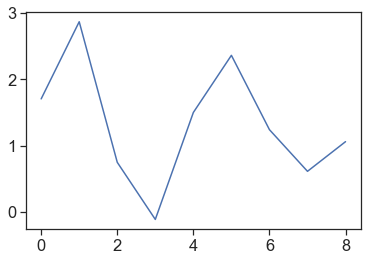

In [631]:
plt.plot(state_representation[0].real)

In [632]:
#sorting approach

In [651]:
y1 = state_representation[:,:-1]
y2 = state_representation[:,1:]

In [ ]:
Ay0 = y1

In [ ]:
np.linalg.inv()

In [665]:
state_representation[:,0]

array([-0.73034338,  0.62441384, -1.00123313, -0.24595158, -0.48420674,
       -0.84118772,  0.6113365 , -0.12422153])

In [667]:
np.linalg.pinv(state_representation[:,1].reshape(1,-1))

array([[ 0.05148805],
       [-0.05421808],
       [-0.02478486],
       [ 0.02966453],
       [-0.01078396],
       [ 0.02245489],
       [-0.05296906],
       [-0.07965835]])

In [652]:
state_representation[:,0]

array([-0.73034338,  0.62441384, -1.00123313, -0.24595158, -0.48420674,
       -0.84118772,  0.6113365 , -0.12422153])

In [653]:
state0[:,0]

array([-0.73034338,  0.62441384, -1.00123313, -0.24595158, -0.48420674,
       -0.84118772,  0.6113365 , -0.12422153])

In [654]:
state_representation[:,1]

array([ 3.05447748, -3.21643356, -1.47033705,  1.75981896, -0.63974749,
        1.33211425, -3.14233676, -4.72565253])

In [670]:
Ahat =np.dot(y2,np.linalg.pinv(y1))

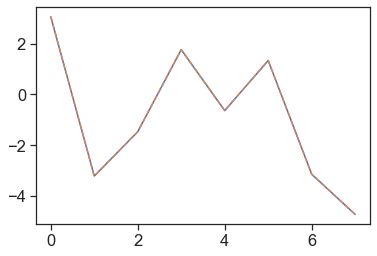

In [671]:
plt.plot(state_representation[:,1])
plt.plot(np.dot(Ahat,state0),linestyle='--')


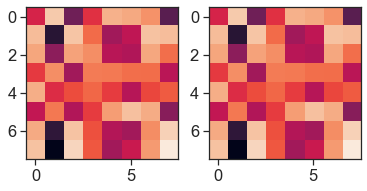

In [672]:
plt.subplot(1,2,1)
plt.imshow(A)
plt.subplot(1,2,2)
plt.imshow(Ahat)
#plt.colorbar()

In [577]:
A

array([[-0.56148971,  2.1071392 , -2.30255692, -0.32280346,  1.6672461 ,
         1.53010516,  1.14900935, -2.70360629],
       [ 1.86701771, -3.59744451,  2.04279674,  0.54104539, -1.51281116,
        -1.01877517,  1.99017831,  1.88656365],
       [ 1.47661398, -1.84530413,  1.42736992,  1.08344969, -1.13389391,
        -1.2657479 ,  1.4968222 ,  0.58681345],
       [-0.17331264,  1.08091121, -1.52229861,  0.78452905,  0.7597814 ,
         0.5886161 ,  0.57782984, -1.10178238],
       [ 1.62548357, -0.41199707,  0.08953901,  0.48512251, -0.15165948,
        -1.15606207,  0.01170442,  0.31732571],
       [-0.94412514,  0.72694635, -1.22539408, -0.1638946 ,  1.34545587,
         1.95513683,  1.59735858, -1.94040706],
       [ 1.5567537 , -3.4627943 ,  2.00699841,  0.1579997 , -1.21021034,
        -1.48660923,  1.06271242,  2.26213663],
       [ 1.97346301, -4.35159141,  2.34838465,  0.26864996, -1.49240411,
        -0.81735346,  1.27697898,  2.74220798]])

In [299]:
np.linalg.eig(Ahat)

(array([ 1.00000000e+00, -1.00000000e+00,  3.65854426e-17, -2.80157292e-16]),
 array([[-0.70423916, -0.13711605,  0.06779878,  0.67633735],
        [ 0.06361763,  0.69368522,  0.70505305,  0.35992016],
        [-0.70423916,  0.13711605,  0.05943416, -0.63472058],
        [ 0.06361763, -0.69368522,  0.70339967,  0.10077224]]))

In [300]:
state_representation2 = [state0]
for _ in range(1,n_states):
    tmp = np.dot(Ahat,state_representation2[-1])
    state_representation2.append(tmp.copy())
    
#this is now n_states n_timepoints 
state_representation2 = np.hstack(state_representation2)

In [301]:
assert np.allclose(state_representation,state_representation2)

In [302]:
np.dot(Ahat,state_representation[:,-1])

array([-0.72235655, -0.93675712, -1.12567984,  1.10369997])

In [303]:
np.dot(A,state_representation[:,-1])

array([-0.72235655, -0.93675712, -1.12567984,  1.10369997])

# Now tackle the complex case 

In [ ]:
#first build population activity
def generate_population_activity():
    